In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | natal
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | bitung
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | columbia
Processing Record 14 of Set 1 | kaoma
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | brae
Processing Record 18 of Set 1 | clive
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | qandala
Processing Record 21 of Set 1 | cabra
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | lata
Processing Recor

Processing Record 41 of Set 4 | angoche
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | bay roberts
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | madang
Processing Record 46 of Set 4 | akola
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | pocoes
Processing Record 50 of Set 4 | khor
Processing Record 1 of Set 5 | kamina
Processing Record 2 of Set 5 | soledad
Processing Record 3 of Set 5 | hermanus
Processing Record 4 of Set 5 | ploiesti
Processing Record 5 of Set 5 | aswan
Processing Record 6 of Set 5 | obidos
Processing Record 7 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 8 of Set 5 | santa isabel do rio negro
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | redding
Processing Record 11 of Set 5 | la ronge
Processing Record 12 of Set 5 | weinan
Processing Record 13 of Set 5 | port hedland
Processing Record 14 of Set 5 | banjarmasin
Pr

City not found. Skipping...
Processing Record 34 of Set 8 | komsomolskiy
Processing Record 35 of Set 8 | artyk
City not found. Skipping...
Processing Record 36 of Set 8 | kichera
Processing Record 37 of Set 8 | naco
Processing Record 38 of Set 8 | muli
Processing Record 39 of Set 8 | jumla
Processing Record 40 of Set 8 | yusva
City not found. Skipping...
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | bad driburg
Processing Record 43 of Set 8 | yakeshi
Processing Record 44 of Set 8 | sicamous
Processing Record 45 of Set 8 | haimen
Processing Record 46 of Set 8 | khomutovo
Processing Record 47 of Set 8 | santa maria
Processing Record 48 of Set 8 | kruisfontein
Processing Record 49 of Set 8 | nara
Processing Record 50 of Set 8 | kineta
Processing Record 1 of Set 9 | micomeseng
Processing Record 2 of Set 9 | khalkhal
Processing Record 3 of Set 9 | dingle
Processing Record 4 of Set 9 | sioux lookout
Processing Record 5 of Set 9 | dekar
Processing Record 6 of Set 9

Processing Record 20 of Set 12 | delta del tigre
Processing Record 21 of Set 12 | oriximina
Processing Record 22 of Set 12 | college
Processing Record 23 of Set 12 | andapa
Processing Record 24 of Set 12 | san carlos de bariloche
Processing Record 25 of Set 12 | felanitx
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | gobabis
Processing Record 28 of Set 12 | nizhnyaya salda
Processing Record 29 of Set 12 | ploufragan
Processing Record 30 of Set 12 | carmelo
Processing Record 31 of Set 12 | moen
Processing Record 32 of Set 12 | kadoma
Processing Record 33 of Set 12 | ransang
Processing Record 34 of Set 12 | la peca
Processing Record 35 of Set 12 | gornyak
Processing Record 36 of Set 12 | chara
Processing Record 37 of Set 12 | vestmannaeyjar
Processing Record 38 of Set 12 | segou
Processing Record 39 of Set 12 | moose factory
Processing Record 40 of Set 12 | araouane
Processing Record 41 of Set 12 | bang phae
Processing Record 42 of Set 12 | odienne
Processin

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,58.62,94,53,3.42,ZA,2022-05-04 23:41:09
1,Atuona,-9.8000,-139.0333,79.47,74,16,15.93,PF,2022-05-04 23:41:09
2,Hilo,19.7297,-155.0900,82.27,84,100,11.50,US,2022-05-04 23:40:52
3,Tuatapere,-46.1333,167.6833,62.10,71,92,5.17,NZ,2022-05-04 23:41:10
4,Tuktoyaktuk,69.4541,-133.0374,26.60,93,100,12.66,CA,2022-05-04 23:41:11
5,Ponta Do Sol,32.6667,-17.1000,63.23,68,41,6.33,PT,2022-05-04 23:41:11
6,Natal,-5.7950,-35.2094,79.02,94,40,5.75,BR,2022-05-04 23:39:06
7,Longyearbyen,78.2186,15.6401,17.44,67,20,8.05,SJ,2022-05-04 23:41:12
8,Ancud,-41.8697,-73.8203,53.96,99,100,6.08,CL,2022-05-04 23:41:13
9,Bitung,1.4451,125.1824,85.05,76,81,0.98,ID,2022-05-04 23:41:13


In [8]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-05-04 23:41:09,-34.5322,20.0403,58.62,94,53,3.42
1,Atuona,PF,2022-05-04 23:41:09,-9.8000,-139.0333,79.47,74,16,15.93
2,Hilo,US,2022-05-04 23:40:52,19.7297,-155.0900,82.27,84,100,11.50
3,Tuatapere,NZ,2022-05-04 23:41:10,-46.1333,167.6833,62.10,71,92,5.17
4,Tuktoyaktuk,CA,2022-05-04 23:41:11,69.4541,-133.0374,26.60,93,100,12.66
...,...,...,...,...,...,...,...,...,...
549,Araouane,ML,2022-05-04 23:57:00,18.9048,-3.5265,86.25,23,68,7.90
550,Bang Phae,TH,2022-05-04 23:57:01,13.6916,99.9298,81.99,88,100,3.04
551,Odienne,CI,2022-05-04 23:57:01,9.5100,-7.5692,74.50,84,91,2.53
552,Campos Belos,BR,2022-05-04 23:57:02,-13.0367,-46.7717,73.47,53,12,1.14


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

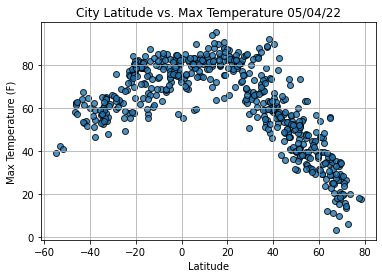

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

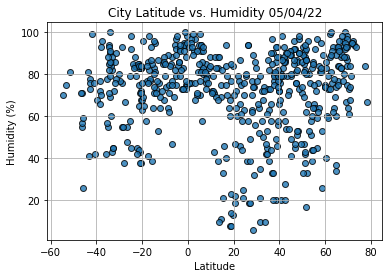

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

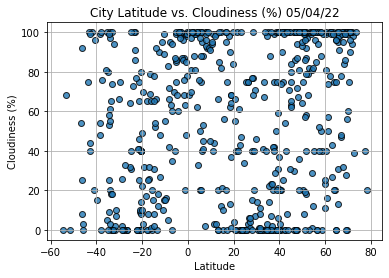

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

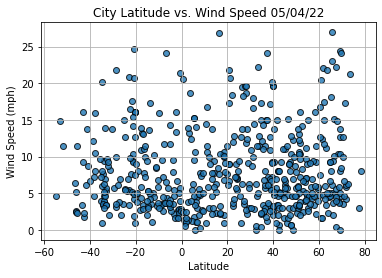

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()